In [109]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from progressbar import progressbar as pbar
from scipy import stats
from local.lib.v2 import histos2d as h2
from importlib import reload
from joblib import delayed
%matplotlib inline
reload(h2)

<module 'local.lib.v2.histos2d' from '/home/rlx/Dropbox/proyectos/2020-2DHISTOS/local/lib/v2/histos2d.py'>

In [98]:
alpha=0.05
t, mu_s, sigma_s, real_mu = 0.03, 80, 6, 0
n_events = 5000 # number of events per experiment

n_experiments = 2000 # number of experiments (each one with n_events) for empirical distributions


# Assumming $\mu=0$

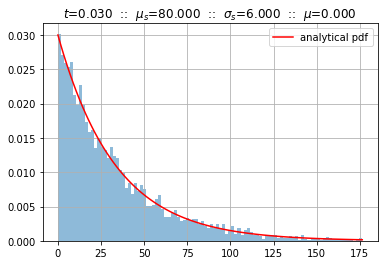

In [99]:
m = h2.SignalBg(t=t, mu_s=mu_s, sigma_s=sigma_s, mu=real_mu)
x = m.rvs(n_events)
m.plot_sample(x, bins=100)

### distribution of the `likelihood` 

In [90]:
lk_samples = [m.log_likelihood(m.rvs(n_events)) for _ in pbar(range(n_experiments))]

100% (2000 of 2000) |####################| Elapsed Time: 0:00:00 Time:  0:00:00


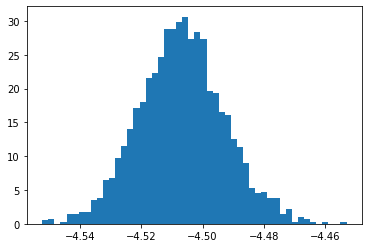

In [91]:
plt.hist(lk_samples, density=True, bins=50);

### distribution of $t_\mu = -2\text{ln}\lambda(\mu)$ 

the resulting pdf is denoted by $f(t_\mu|0)$

In [101]:
t0_samples = [m.get_t_mu(m.rvs(n_events)) for _ in pbar(range(n_experiments))]

100% (2000 of 2000) |####################| Elapsed Time: 0:00:25 Time:  0:00:25


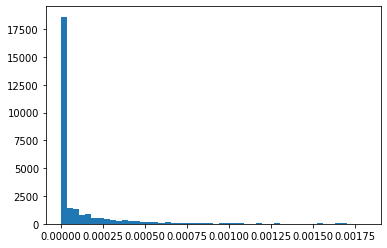

In [102]:
plt.hist(t0_samples, density=True, bins=50);

### distribution of $\hat{\mu}$ (MLE for $\mu$ given all other params fixed)

In [104]:
mu_hat_samples = [m.get_mu_hat(m.rvs(n_events)) for _ in pbar(range(n_experiments))]

100% (2000 of 2000) |####################| Elapsed Time: 0:00:23 Time:  0:00:23


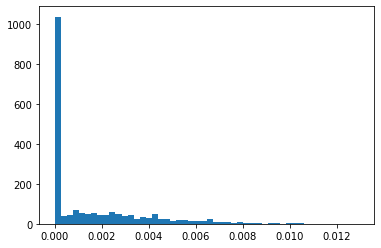

In [105]:
plt.hist(mu_hat_samples, bins=50);

# Follow section 3.1. Test $\mu=0$, but data $\sim \mu'=0.2$ 

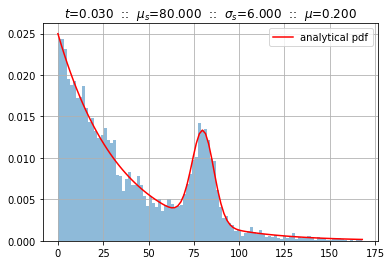

In [106]:
m = h2.SignalBg(t=t, mu_s=mu_s, sigma_s=sigma_s, mu=0.2)
x = m.rvs(n_events)
m.plot_sample(x, bins=100)

### distribution of $t_\mu = -2\text{ln}\lambda(\mu)$ 

the resulting pdf is denoted by $f(t_\mu|\mu')$ eq [34]

In [107]:
tm_samples = [m.get_t_mu(m.rvs(n_events)) for _ in pbar(range(n_experiments))]

100% (2000 of 2000) |####################| Elapsed Time: 0:00:53 Time:  0:00:53


(-4.192593650031995e-08, 0.0009121663115205791)

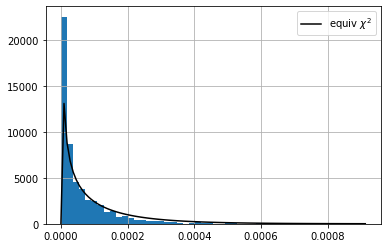

In [121]:
from scipy import stats
h2.distplot(tm_samples, bins=50, 
            pdf=stats.chi2(df=1,loc=0, scale=np.std(tm_samples)).pdf, 
            pdf_name="equiv $\chi^2$")

but does not match the actual equation [34]

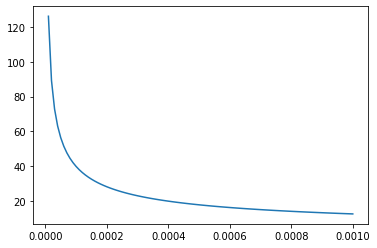

In [124]:
tr = np.linspace(1e-5,0.001,100)
f = lambda tm: 1/np.sqrt(2*np.pi*tm)*np.exp(-0.5*tm)
plt.plot(tr, f(tr))

### distribution of $\hat{\mu}$ (MLE for $\mu$ given all other params fixed)

In [114]:
mu_hat_samples = [m.get_mu_hat(m.rvs(n_events)) for _ in pbar(range(n_experiments))]

100% (2000 of 2000) |####################| Elapsed Time: 0:00:51 Time:  0:00:51


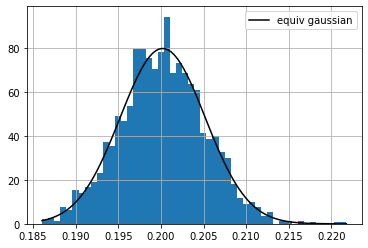

In [118]:
h2.distplot(mu_hat_samples, bins=50,
            pdf=stats.norm(loc=np.mean(mu_hat_samples), scale=np.std(mu_hat_samples)).pdf,
            pdf_name="equiv gaussian");